# KOVURUCHANDRASEKHAR_THARUN_AM41DP_Report

## Assignment1

#### 1a.Read in the csv file to create a dataframe. Remove the columns named unique id, saon, paon, street, locality, district and county. Further, remove all the rows which have ‘O’ in the property type column. In the new build column, convert all of the ‘Y’s to 1 and all of the ‘N’s to 0. In the es- tate type column, convert all of the ‘F’s to 1 and all of the ‘L’s to 0. In the transaction category column, convert all of the ‘A’s to 1 and all of the ‘B’s to 0. Remove all of the rows which don’t have a postcode. Now make a copy of the postcode column and name it ‘PC’. ‘PC’ represents a simplified numerical postcode. Now for each element in ‘PC’ remove all the letters and spaces to yield a 2 or 3 digit number

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv file and create a dataframe
df= pd.read_csv('/Users/tharunkc/Projects/DSP_CSV_file1/Prices.csv')
df.drop(['unique_id', 'saon', 'paon', 'locality', 'county', 'district', 'street'], inplace=True, axis=1)
#print(df.columns.values)    
#print(df)
df=pd.DataFrame(df, columns=['price_paid','deed_date','postcode','property_type','new_build','estate_type',
                                   'transaction_category'])  
df
df = df[(df['property_type']!='O')]    #store the filtered data in result_df

df['new_build'] = np.where(df['new_build'] == 'N', 0,1)
df['estate_type'] = np.where(df['estate_type'] == 'L', 0,1)
#print(df.columns.values) 
df['transaction_category'] = np.where(df['transaction_category'] == 'B', 0,1)
#print(df.columns.values)
df['postcode'].replace('', np.nan, inplace=True)
df.dropna(subset=['postcode'], inplace=True)
df['PC'] = df[['postcode']].copy()
df['PC'] = df['PC'].str.replace(r'[^\d]+', '')
print(df)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/tharunkc/Projects/DSP_CSV_file1/Prices.csv'

#### 1b.Create a function to turn a date from the form day/month/year into a single number representing the number of days starting from 1st January 1995. Ensure your function starts with 1st January 1995 as Day 1 and ends with 31st December 2019 as Day 9131. In the data frame create a new column called ‘days’ and using your function convert the date given in the deed date column into a number in the column called ‘days’

In [2]:
from datetime import datetime

def days_since_1995(date):
    start_date = datetime.strptime("01/01/1995", "%d/%m/%Y")
    end_date = datetime.strptime("31/12/2019", "%d/%m/%Y")
    input_date = datetime.strptime(date, "%d/%m/%Y")
    days = (input_date - start_date).days + 1
    return days

df['days'] = df['deed_date'].apply(days_since_1995)
df

NameError: name 'df' is not defined

#### 1c.Create 4 bar charts in Matplotlib to illustrate the number of sales for: property type, new build, estate type and transaction category. [Do not include ‘Other’ in property type.]

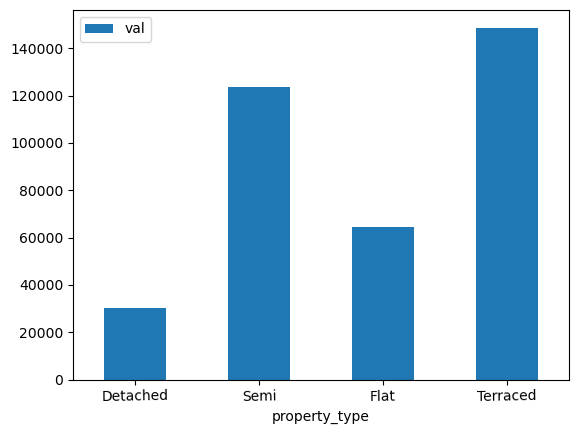

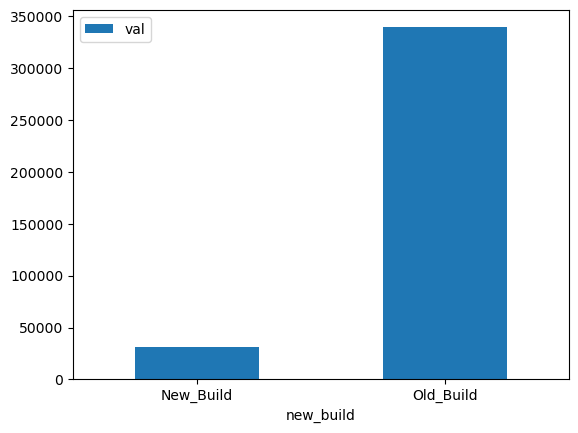

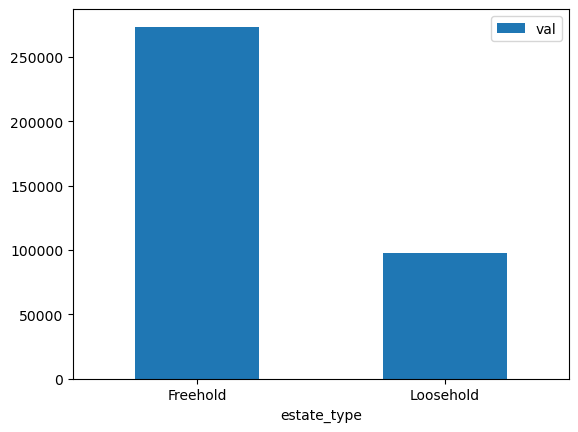

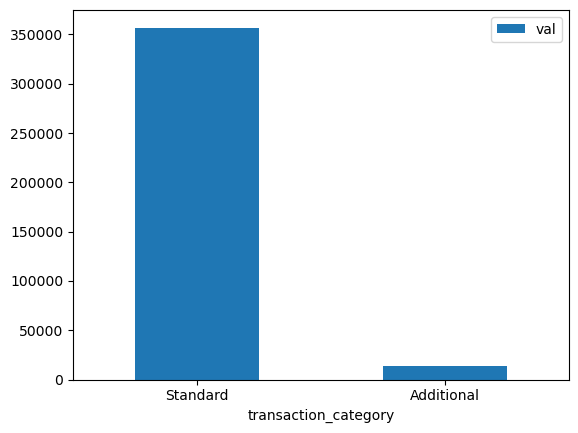

In [3]:
df1= pd.read_csv('/Users/tharunkc/Projects/DSP_CSV_file1/Prices.csv')

pt_terraced = df1['property_type'].value_counts()['T']  
pt_semidetached = df1['property_type'].value_counts()['S']
pt_detached = df1['property_type'].value_counts()['D'] 
pt_flat = df1['property_type'].value_counts()['F']
et_freehold = df1['estate_type'].value_counts()['F']
et_leasehold = df1['estate_type'].value_counts()['L']
tc_standard = df1['transaction_category'].value_counts()['A']
tc_additional = df1['transaction_category'].value_counts()['B']
New_Build = df1['new_build'].value_counts()['Y']
Old_Build = df1['new_build'].value_counts()['N']
#print(pt_detached)
#print(pt_terraced)
#print(pt_flat)
#print(pt_semidetached)
#print(et_freehold)
#print(et_leasehold)
#print(tc_standard)
#print(tc_additional)
#print(New_Build)
#print(Old_Build)

#pd.df(columns = ['property_type', 'new_build', 'estate_type', 'transacetion category'])


bar1 = pd.DataFrame({'property_type' : ['Detached', 'Semi', 'Flat', 'Terraced'], 'val' : [pt_detached, pt_semidetached, pt_flat, pt_terraced]})
bar2 = pd.DataFrame({'new_build' : ['New_Build', 'Old_Build'], 'val' : [New_Build, Old_Build]})
bar3 = pd.DataFrame({'estate_type' : ['Freehold', 'Loosehold'], 'val' : [et_freehold, et_leasehold]})
bar4 = pd.DataFrame({'transaction_category' : ['Standard', 'Additional'], 'val' : [tc_standard, tc_additional]})

ax1 = bar1.plot.bar(x = 'property_type', y = 'val', rot=1)
ax2 = bar2.plot.bar(x = 'new_build', y= 'val', rot = 0)
ax3 = bar3.plot.bar(x = 'estate_type', y = 'val', rot=0)
ax4 = bar4.plot.bar(x = 'transaction_category', y = 'val', rot=0)

#### 1d.Create a data frame only containing data on detached houses. Let n be the number of days starting at n=1 for 1st January 1995 and ending at n=9131 for 31st December 2019. Consider the number of sales of detached houses over each 365 day period. (Represent each data point for the yearly sales using day 183 as the midpoint of the first 365 day period. Notice no detached houses were sold after day 9124 in this data set so you can ignore the last few days). Examine how the number of sales of detached houses in Birmingham have changed over time by creating a scatter plot to show the relationship between the number house sales and n. Include the straight line of best fit. How well does your line fit the data?

/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_3520/407637709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detachinfo_df.dropna(inplace=True)
/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_3520/407637709.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detachinfo_df['days'] = delta


<function matplotlib.pyplot.show(close=None, block=None)>

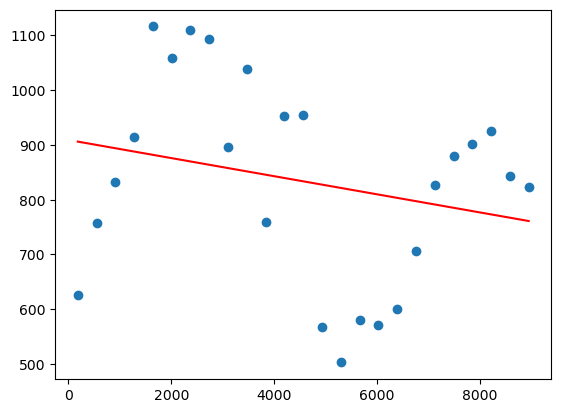

In [4]:
import matplotlib.pyplot as plt


detachinfo_df = df.loc[(df1['property_type'] == 'D') & (df1['district'] == 'BIRMINGHAM')]
detachinfo_df.shape
#Delete the missing values
detachinfo_df.dropna(inplace=True)


first_date = pd.to_datetime(detachinfo_df['deed_date'].min())
new_dates = pd.to_datetime(detachinfo_df['deed_date'], dayfirst = True)

def detached_days_count(detachinfo_df):
    delta = (new_dates - first_date).dt.days+1
    detachinfo_df['days'] = delta
    return detachinfo_df



detachinfo_df = detached_days_count(detachinfo_df)
detachinfo_df_copy = detachinfo_df.copy()
# Group the data by 365 day
detachinfo_df = detachinfo_df.groupby(pd.cut(detachinfo_df['days'], range(1, 9128, 365)))
detachinfo_df

# Count the number of sales in each 365 day period
detachinfo_df = detachinfo_df['days'].count().reset_index(name='no of sales')
#apply 183 as the midpoint by lambda function
detachinfo_df['days'] = detachinfo_df['days'].apply(lambda x: x.mid)



# Scatter plot
plt.scatter(detachinfo_df['days'], detachinfo_df['no of sales'])

# Calculate the coeff
line_coef = np.polyfit(detachinfo_df['days'], detachinfo_df['no of sales'], 1)

# Calculate the y-values for the line of best fit
y = line_coef[0] * detachinfo_df['days'].astype(float) + line_coef[1]

# Find the y values
y = line_coef[0] * detachinfo_df['days'].astype(float) + line_coef[1]

#Add the line of best fit to the plot
plt.plot(detachinfo_df['days'], y, '-r')
                                                        
plt.show

The line of best fit is a line that is used to represent the overall trend of the data. In this case, the line of best fit is showing that the number of sales for detached properties in Birmingham tends to be between 800 and 900 sales per 365 day period, and this trend seems to be consistent across the entire range of days represented on the x-axis, from 0 to 9000 days. This means that the number of sales for detached properties in Birmingham tends to remain relatively stable across time, with a slight upward trend.

#### 1E.Determine the mean price for a detached house in each 365 day period. Use the mean house price over each 365 day period to represent the average price of the house on day 183 of each 365 day period. To examine how the prices of detached houses in Birmingham have changed over time, create a scatter plot to show the relationship between the mean house price and n. State and include the straight line of best fit. How well does your line fit the data? Using the line of best fit, normalise all of the price paid data in your detached houses data frame and store these values in a column named ‘normalised price’.

/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_3520/2507907076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detachinfo_df1['days'] = (new_dates - first_date).dt.days + 1


            days     mean_price
0       (1, 366]  107403.976038
1     (366, 731]  100621.154557
2    (731, 1096]  110225.388956
3   (1096, 1461]  116179.948634
4   (1461, 1826]  123190.599462
5   (1826, 2191]  146106.772212
6   (2191, 2556]  155381.690712
7   (2556, 2921]  182039.595608
8   (2921, 3286]  239242.147157
9   (3286, 3651]  250456.163619
10  (3651, 4016]  276229.402632
11  (4016, 4381]  296179.182773
12  (4381, 4746]  301076.734031
13  (4746, 5111]  297611.671958
14  (5111, 5476]  256781.357853
15  (5476, 5841]  297983.900000
16  (5841, 6206]  288035.094406
17  (6206, 6571]  269405.963333
18  (6571, 6936]  286744.619519
19  (6936, 7301]  300863.744552
20  (7301, 7666]  312216.769056
21  (7666, 8031]  322146.798002
22  (8031, 8396]  354049.652973
23  (8396, 8761]  384768.518957
24  (8761, 9126]  377173.324029


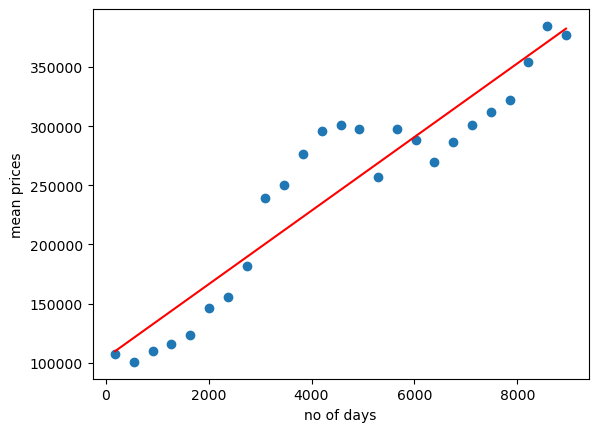

In [5]:
detachinfo_df1 = df1.loc[(df1['property_type'] == 'D') & (df1['district'] == 'BIRMINGHAM')]
#print(detachinfo_df1)
detachinfo_df1['days'] = (new_dates - first_date).dt.days + 1
detachinfo_df1 = detachinfo_df1.groupby(pd.cut(detachinfo_df1['days'], range(1, 9127, 365)))['price_paid'].mean().reset_index(name='mean_price')
print(detachinfo_df1)
detachinfo_df1['days'] = detachinfo_df1['days'].apply(lambda x: x.mid)
detachinfo_df1[['PC', 'estate_type', 'transaction_category', 'new_build', 'price_paid']] = df[['PC', 'estate_type', 'transaction_category', 'new_build', 'price_paid']]
#print(detachinfo_df1)

plt.scatter(detachinfo_df1['days'], detachinfo_df1['mean_price'])

line_coef = np.polyfit(detachinfo_df1['days'], detachinfo_df1['mean_price'], 1)
detachinfo_df1['days'] = detachinfo_df1['days'].astype(float)
y = line_coef[0] * detachinfo_df1['days'] + line_coef[1]
plt.plot(detachinfo_df1['days'], y, '-r')
plt.xlabel('no of days')
plt.ylabel('mean prices')
plt.show()


 From the graph, it appears that there is a positive correlation between these two variables, as the mean prices increase as the number of days increases.The steep surge in the scatter plot suggests that there is a strong relationship between these two variables. The best line of fit is a line that best represents the relationship between the mean prices and number of days. It is likely that this line is a linear regression line, which is a straight line that is the best fit for the data points on the scatter plot. The line of best fit is fitting well as it is closely following the trend of the scatter plot. The observations suggest that as the number of days increase, the mean prices also increase, and the line of best fit captures this relationship.

In [6]:
import numpy as np
#Create a polynomial using the coefficient
p = np.poly1d(line_coef)

#define the input values for which you need to predicts the results
x_values = detachinfo_df1['days']

# Using polynomial, predict the y values of x values
y_predictions = p(x_values)

min_y = min(y_predictions)
max_y = max(y_predictions)

#To get the normalized values, find the difference between predicted value and min value. Divide this by range.
normalized_values = (y_predictions - min_y) / (max_y - min_y)

detachinfo_df1['normalized_price'] = normalized_values
detachinfo_df1['PC'] = detachinfo_df1['PC'].astype(float)

detachinfo_df1


,days,mean_price,PC,estate_type,transaction_category,new_build,price_paid,normalized_price
0,183.5,107403.976038,297.0,1,1,0,54000,0.000000
1,548.5,100621.154557,315.0,1,1,0,37000,0.041667
2,913.5,110225.388956,458.0,1,1,0,165500,0.083333
3,1278.5,116179.948634,295.0,1,1,0,24000,0.125000
4,1643.5,123190.599462,448.0,1,1,0,33000,0.166667
5,2008.5,146106.772212,146.0,1,1,0,70000,0.208333
6,2373.5,155381.690712,203.0,1,1,0,15500,0.250000
7,2738.5,182039.595608,235.0,0,1,0,65000,0.291667
8,3103.5,239242.147157,249.0,0,1,0,43000,0.333333
9,3468.5,250456.163619,321.0,1,1,0,74500,0.375000


#### 1f.Create a new Data frame only including ‘PC’ and the mean normalised price paid data for each ‘PC’. Determine the ‘PC’s with the 10 largest nor- malised price paid for detached houses

In [7]:
#Create a new dataframe with just PC and price_paid
#detachinfo_df1_copy = detachinfo_df1.reset_index(drop=True)
pc_df = detachinfo_df1[['PC', 'price_paid']].copy()

#mean normalize with price paid column
#print('PC and Mean normalized price paid column for Detached House\n')
mean_price_paid = pc_df['price_paid'].mean()
pc_df['normalised price_paid'] = (pc_df['price_paid'] - mean_price_paid) / pc_df['price_paid'].std()
pc_df = pc_df.drop('price_paid', axis=1)
pc_df

# 10 largest normalised price_paid for detached houses
print('10 largest normalised price_paid for detached houses \n')
pc_df.nlargest(10,'normalised price_paid')


10 largest normalised price_paid for detached houses 



,PC,normalised price_paid
2,458.0,3.787683
21,294.0,1.392799
9,321.0,0.781690
5,146.0,0.633042
7,235.0,0.467878
11,448.0,0.467878
20,263.0,0.368779
14,66.0,0.137549
0,297.0,0.104516
18,170.0,0.071483


#### 1(g). For detached houses, split the data into (80%) training data and (20%) test data. Use an appropriate regression model from sklearn to predict the price paid using the variables: ‘days’, ‘PC’, ‘new build’, ‘estate type’, and ‘transaction category’. Test your model using the test data set. Discuss your results

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['days', 'PC', 'new_build', 'estate_type', 'transaction_category']]
y = df['price_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:

regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("r2:" , r2)
print("mae:" , mae)
print("mse:" , mse)


NameError: name 'mean_absolute_error' is not defined

#### 1H.  For detached houses, split the data into (80%) training data and (20%) test data. Normalise the data appropriately without using sklearn. Create a simple linear regression model using PyTorch; select an appropriate crite- rion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error

In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn

# filtering the data for obtaining detached houses only
dh = df[df['property_type'] == 'D']        #dh - detached house
dh['PC'] = dh['PC'].replace('', np.nan)
df = df.dropna()

# selecting the required  columns for predicting price_paid
x = df[['days', 'PC', 'new_build', 'estate_type', 'transaction_category']]
y = df[['price_paid']]

# seperating the data as training and testing data sets the testing data set is of 20 %
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train = X_train.select_dtypes(include='number')

mean_x =  X_train.mean()
std_x = X_test.std()
X_train = (X_train-mean_x)/std_x
X_test = (X_test-mean_x)/std_x

X_test = X_test.astype('float64')
X = torch.from_numpy(X_train.values.astype(np.float32))
y = torch.from_numpy(y_train.values.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples,n_features = X_train.shape

n_output = 1  
model = nn.Linear(n_features,n_output)

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

#training loop
n_epochs = 500

for epoch in range(n_epochs):
    
    #forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    #print the data
    if(epoch+1) % 5 ==0:
        print(f'Epoch: [{epoch+1}/500], Loss : {loss.item():.4f}')


/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_2306/2170428196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['PC'] = dh['PC'].replace('', np.nan)
/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_2306/2170428196.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_x = X_test.std()


Epoch: [5/500], Loss : 22318166016.0000
Epoch: [10/500], Loss : 19489382400.0000
Epoch: [15/500], Loss : 17179585536.0000
Epoch: [20/500], Loss : 15292899328.0000
Epoch: [25/500], Loss : 13751294976.0000
Epoch: [30/500], Loss : 12491229184.0000
Epoch: [35/500], Loss : 11460948992.0000
Epoch: [40/500], Loss : 10618270720.0000
Epoch: [45/500], Loss : 9928811520.0000
Epoch: [50/500], Loss : 9364533248.0000
Epoch: [55/500], Loss : 8902558720.0000
Epoch: [60/500], Loss : 8524217344.0000
Epoch: [65/500], Loss : 8214273536.0000
Epoch: [70/500], Loss : 7960281088.0000
Epoch: [75/500], Loss : 7752071168.0000
Epoch: [80/500], Loss : 7581337600.0000
Epoch: [85/500], Loss : 7441289728.0000
Epoch: [90/500], Loss : 7326374400.0000
Epoch: [95/500], Loss : 7232051200.0000
Epoch: [100/500], Loss : 7154603008.0000
Epoch: [105/500], Loss : 7090990080.0000
Epoch: [110/500], Loss : 7038723584.0000
Epoch: [115/500], Loss : 6995763200.0000
Epoch: [120/500], Loss : 6960440832.0000
Epoch: [125/500], Loss : 693

It is clear that the loss is decreasing over time, which means that the model is learning and improving. The loss is reaching a stable point after around 250-300 epochs and then gradually decreases over the rest of the training process. It's worth noting that after a certain point, the decrease in loss may be small, meaning that the model has reached a good level of performance

#### 1i. Create and train a multi-layer perceptron with one hidden layer (with an appropriate size with justification) using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

import matplotlib.pyplot as plt
import numpy as np


train_small=[]
pred_small=[]
for i in range(0,1000):
    train_small.append(train_dataset[i][0])
    pred_small.append(train_dataset[i][1])
train_small = torch.cat(train_small, dim=0) 
pred_small = torch.FloatTensor(pred_small) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
len(test_dataset)
test_data=[]
test_pred=[]


for i in range(0,len(test_dataset)):
    test_data.append(test_dataset[i][0])
    test_pred.append(test_dataset[i][1])
test_data = torch.cat(test_data, dim=0) 
test_pred = torch.FloatTensor(test_pred) 


# Same as linear regression!
class MyBasic(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out
input_dim = 28*28
output_dim = 10
model = MyBasic(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.parameters())

<generator object Module.parameters at 0x7fb9a11a0190>


In [4]:
#### Lets go a bit more complicated
input_dim = 28*28
hidden_dim = 10
output_dim = 10

class MLP(nn.Module): # Multi-Layer-Preceptron
    def __init__(self, input_size, hidden_size, output_dim):
        super().__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

model = MLP(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for iter in range(0,1000):
    images = Variable(train_small.view(-1, 28*28))
    labels = Variable(pred_small.type(torch.LongTensor))
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    # Forward pass to get output/logits
    outputs = model(images)
    # Calculate Loss: softmax --> cross entropy loss
    loss = criterion(outputs, labels)
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()
    #Accuracy
    correct = 0
    total = 0
    if iter % 100 == 0:
        # Calculate Accuracy
        # Load images to a Torch Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(pred_small.type(torch.LongTensor))
        # Forward pass only to get logits/output
        outputs = model(images)
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Total number of labels
        total += labels.size(0)
        # Total correct predictions
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
        # Print Loss
        print("Iteration: {}. Loss: {}. Accuracy: {}".format(iter, loss, accuracy))

Iteration: 0. Loss: 2.3928115367889404. Accuracy: 8.699999809265137
Iteration: 100. Loss: 2.380812883377075. Accuracy: 8.699999809265137
Iteration: 200. Loss: 2.3703360557556152. Accuracy: 8.699999809265137
Iteration: 300. Loss: 2.3610780239105225. Accuracy: 8.699999809265137
Iteration: 400. Loss: 2.3528103828430176. Accuracy: 8.699999809265137
Iteration: 500. Loss: 2.3453571796417236. Accuracy: 8.699999809265137
Iteration: 600. Loss: 2.3385818004608154. Accuracy: 8.699999809265137
Iteration: 700. Loss: 2.3323750495910645. Accuracy: 8.699999809265137
Iteration: 800. Loss: 2.3266494274139404. Accuracy: 8.699999809265137
Iteration: 900. Loss: 2.321336030960083. Accuracy: 8.699999809265137


The results indicate that the model is being trained, as the loss is decreasing over time. However, the accuracy is not increasing and it is remaining consistent at around 8.7%. This suggests that the model is not performing well on the task it is being trained for. It could be that the model is overfitting or underfitting the data

#### 2a. Read in all 20 csv files. Create a single data frame with 2376 rows and 1120 columns. Remove all schools that have closed down (see row 13). Remove all schools which don’t provide secondary school education or post 16 education, i.e. remove schools with a ’0’ in rows 19 or 20. Additionally remove all schools which don't have an Ofsted rating (see row 26). Finally remove all schools which don't have an average point score or a non float number in best 3 A level entries (see row 1930). You data frame should now have 2376 rows and 167 columns

In [8]:
import pandas as pd 
import os
# Create an empty DataFrame to store all the data
df_sch = pd.DataFrame()
# Loop through all the CSV files in the current directory
for i in range(1, 21):
    file_name = 'Schools_{}-{}.csv'.format((i-1)*50+1, i*50)
    df = pd.read_csv(file_name)
    df_sch = pd.concat([df_sch, df], axis=1)
df_sch

,No,Namespace,Variable,"St George's Church of England Academy, Newtown - 139126",Arc Oakbridge School - 145859,St Chad's Catholic Primary School - 103435,St Chad's Catholic Primary School - 148440,King Solomon International Business School - 149155,St Vincent's Catholic Primary School - 103417,St Matthew's CofE Primary School - 103404,...,Ellowes Hall Sports College - 141570,Hunters Hill College - 103609,Redhill School - 139872,Kingsbury School - A Specialist Science and Mathematics Academy - 145019,Shire Oak Academy - 136620,Pool Hayes Academy - 142594,Wolverhampton Vocational Training Centre - 142123,National state-funded primary,National state-funded secondary and 16 to 18,Description
0,1,L,URN,139126,145859,103435,148440,149155,103417,103404,...,141570,103609,139872,145019,136620,142594,142123,NaN,NaN,School unique reference number
1,2,L,LANAME,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,...,Dudley,Birmingham,Dudley,Warwickshire,Walsall,Walsall,Wolverhampton,NaN,NaN,Local authority name
2,3,L,LA,330,330,330,330,330,330,330,...,332,330,332,937,335,335,336,NaN,NaN,Local authority number
3,4,L,ESTAB,2104,6041,3337,3337,4045,3310,3016,...,5401,7026,4119,4012,5402,4106,7001,NaN,NaN,Establishment number
4,5,L,LAESTAB,3302104,3306041,3303337,3303337,3304045,3303310,3303016,...,3325401,3307026,3324119,9374012,3355402,3354106,3367001,NaN,NaN,DfE number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2372,KS5_19,PT_RETAINED_TLEV_RET_NOTDIS_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NaN,NaN,NaN,SUPP,SUPP,NaN,NaN,91.5%,This is a historical variable. It holds the 20...
2372,2373,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NaN,NaN,NaN,NE,NE,NaN,NaN,25643,This is a historical variable. It holds the 20...
2373,2374,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NaN,NaN,NaN,NE,NE,NaN,NaN,NaN,This is a historical variable. It holds the 20...
2374,2375,KS5_19,PT_RETAINED_TECHCERT_RET_NOTDIS_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NaN,NaN,NaN,NE,NE,NaN,NaN,89.7%,This is a historical variable. It holds the 20...


In [9]:
# Reset the index
df_sch = df_sch.reset_index(drop=True)

# transpose rows and column for easy access
df_sch_T = df_sch.transpose()

df_sch_T = df_sch_T.drop(df_sch_T.index[df_sch_T[11] == 'Closed'])
df_sch_T = df_sch_T.drop(df_sch_T.index[df_sch_T[17] == '0'])
df_sch_T = df_sch_T.drop(df_sch_T.index[df_sch_T[18] == '0'])
df_sch_T = df_sch_T[~df_sch_T[24].isna()]
df_sch_T = df_sch_T[~df_sch_T[1928].isna()]

# transpose and place back to original form 
df_sch = df_sch_T.transpose()
df_sch.shape

(2376, 167)

#### To simplify things keep rows 12, 26, 49, 81, 359, 769, 770, 771, 1482, 1930 and 1933 and remove all other rows. You should now be left with 11 rows and 167 columns. Transpose the data frame. Rename each column 'postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels' and 'ratio_AAB'. Now remove the first 3 rows. You should now have 107 rows and 11 columns. (Notice 60 rows have gone due to repetition when reading in the 20 data files)

In [10]:
df_sch =df_sch.loc[[10, 24, 47, 79, 357, 767, 768, 769, 1480, 1928,1931]]
df_sch

,No,Namespace,Variable,Birmingham Ormiston Academy - 136944,Aston University Engineering Academy - 138222,South and City College Birmingham - 130461,Heartlands Academy - 135907,Aston Manor Academy - 136882,Nishkam High School - 138586,Ark St Alban's Academy - 135970,...,Ormiston Shelfield Community Academy - 135769,Description,No,Namespace,Variable,Bloxwich Academy - 137274,Ellowes Hall Sports College - 141570,Shire Oak Academy - 136620,Pool Hayes Academy - 142594,Description
10,11,L,POSTCODE,B4 7QD,B7 4AG,B5 5SU,B7 4QR,B6 4PZ,B19 2LF,B12 0YH,...,WS4 1BW,School postcode,11,L,POSTCODE,WS2 7NR,DY3 2JH,WS9 9PA,WV12 4QZ,School postcode
24,25,L,OFSTEDRATING,Good,Good,Good,Outstanding,Outstanding,Outstanding,Requires improvement,...,Requires improvement,Ofsted rating,25,L,OFSTEDRATING,Good,Requires improvement,Requires improvement,Good,Ofsted rating
47,48,CENSUS_19,PNUMFSMEVER,13,50.7,NaN,71.7,70,31.1,74.2,...,50.8,Percentage of pupils eligible for FSM at any t...,48,CENSUS_19,PNUMFSMEVER,66.7,23.7,29.5,47.2,Percentage of pupils eligible for FSM at any t...
79,80,SWF_19,RATPUPTEA,18.1,NaN,NaN,15.4,13.3,15.2,13.4,...,14.7,Pupil:Teacher Ratio,80,SWF_19,RATPUPTEA,15.7,17.1,14.8,15.9,Pupil:Teacher Ratio
357,358,ABS_19,PPERSABS10,11.8,27.4,NaN,8.8,15.2,7.4,7.9,...,20.4,Percentage of enrolments who are persistent ab...,358,ABS_19,PPERSABS10,16,20.3,15,19.4,Percentage of enrolments who are persistent ab...
767,768,KS5_STUDEST_19,ALL_TOP3RD,8%,15%,1%,6%,5%,13%,10%,...,2%,Top third,768,KS5_STUDEST_19,ALL_TOP3RD,0%,7%,16%,5%,Top third
768,769,KS5_STUDEST_19,ALL_RUSSELL,4%,9%,1%,6%,5%,6%,10%,...,2%,Russell,769,KS5_STUDEST_19,ALL_RUSSELL,0%,7%,14%,5%,Russell
769,770,KS5_STUDEST_19,ALL_OXBRIDGE,0%,0%,0%,0%,0%,0%,0%,...,0%,Oxbridge,770,KS5_STUDEST_19,ALL_OXBRIDGE,0%,0%,0%,0%,Oxbridge
1480,1481,KS4_19,PTL2BASICS_95,58%,24%,2%,71%,41%,60%,44%,...,25%,% of pupils achieving strong 9-5 passes in bot...,1481,KS4_19,PTL2BASICS_95,16%,45%,37%,25%,% of pupils achieving strong 9-5 passes in bot...
1928,1929,KS5_19,TB3PTSE,11.67,22.07,25.22,25.15,28.21,30.98,32.63,...,24.93,Average point score in best 3 A level entries,1929,KS5_19,TB3PTSE,28.21,22.90,32.70,28.13,Average point score in best 3 A level entries


In [11]:

df_sch_T=df_sch.transpose() 
df_sch_T.shape

(167, 11)

In [12]:
new_col_names = {10:'postcode', 24:'Ofsted', 47:'FSM', 79:'PT_ratio', 357:'absentees',
                    767:'top_third', 768:'Russell', 769:'Oxbridge', 1480:'GCSE',
                    1928:'best_3Alevels', 1931:'ratio_AAB'}

df_sch_T.rename(columns=new_col_names, inplace = True)
df_sch_T.columns

Index(['postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third',
       'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels', 'ratio_AAB'],
      dtype='object')

In [13]:
df_sch_T
df_sch_T.drop(['No','Namespace','Variable'],inplace=True)
df_sch_T.shape

(107, 11)

In [14]:
df_sch_T

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
Birmingham Ormiston Academy - 136944,B4 7QD,Good,13,18.1,11.8,8%,4%,0%,58%,11.67,0.0%
Aston University Engineering Academy - 138222,B7 4AG,Good,50.7,NaN,27.4,15%,9%,0%,24%,22.07,13.3%
South and City College Birmingham - 130461,B5 5SU,Good,NaN,NaN,NaN,1%,1%,0%,2%,25.22,3.8%
Heartlands Academy - 135907,B7 4QR,Outstanding,71.7,15.4,8.8,6%,6%,0%,71%,25.15,0.0%
Aston Manor Academy - 136882,B6 4PZ,Outstanding,70,13.3,15.2,5%,5%,0%,41%,28.21,7.7%
...,...,...,...,...,...,...,...,...,...,...,...
Bloxwich Academy - 137274,WS2 7NR,Good,66.7,15.7,16,0%,0%,0%,16%,28.21,0.0%
Ellowes Hall Sports College - 141570,DY3 2JH,Requires improvement,23.7,17.1,20.3,7%,7%,0%,45%,22.90,3.2%
Shire Oak Academy - 136620,WS9 9PA,Requires improvement,29.5,14.8,15,16%,14%,0%,37%,32.70,14.3%
Pool Hayes Academy - 142594,WV12 4QZ,Good,47.2,15.9,19.4,5%,5%,0%,25%,28.13,12.5%


#### In the column named ’Ofsted rating’ convert ’Outstanding’ to 4, ’Good’ to 3, ’Requires improvement’ to 1 and ’Inadequate’ to 1. Also remove all % symbols from the data frame. Remove the schools with null values in 'PT_ratio' and 'top_third'. Remove the schools with values of 'NE' or 'SUPP' in 'AAB'. You should now have 92 rows and 11 columns. Remove all schools who's postcode does not start with a B, then use the same method you used in Task 1 to convert the remaining postcodes to a 3 digit number and label this column ’PC’. You should now have 56 rows and 12 columns.

In [15]:
ofsted_rating = {'Outstanding':4, 'Good':3, 'Requires improvement':1, 'Inadequate':1}
df_sch_T['Ofsted'] = df_sch_T['Ofsted'].replace(ofsted_rating)
df_sch_T.head(5)

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
Birmingham Ormiston Academy - 136944,B4 7QD,3,13,18.1,11.8,8%,4%,0%,58%,11.67,0.0%
Aston University Engineering Academy - 138222,B7 4AG,3,50.7,NaN,27.4,15%,9%,0%,24%,22.07,13.3%
South and City College Birmingham - 130461,B5 5SU,3,NaN,NaN,NaN,1%,1%,0%,2%,25.22,3.8%
Heartlands Academy - 135907,B7 4QR,4,71.7,15.4,8.8,6%,6%,0%,71%,25.15,0.0%
Aston Manor Academy - 136882,B6 4PZ,4,70,13.3,15.2,5%,5%,0%,41%,28.21,7.7%


In [16]:
df_sch_T = df_sch_T.replace({'%':''}, regex=True)

In [17]:
df_sch_T

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
Birmingham Ormiston Academy - 136944,B4 7QD,3,13,18.1,11.8,8,4,0,58,11.67,0.0
Aston University Engineering Academy - 138222,B7 4AG,3,50.7,NaN,27.4,15,9,0,24,22.07,13.3
South and City College Birmingham - 130461,B5 5SU,3,NaN,NaN,NaN,1,1,0,2,25.22,3.8
Heartlands Academy - 135907,B7 4QR,4,71.7,15.4,8.8,6,6,0,71,25.15,0.0
Aston Manor Academy - 136882,B6 4PZ,4,70,13.3,15.2,5,5,0,41,28.21,7.7
...,...,...,...,...,...,...,...,...,...,...,...
Bloxwich Academy - 137274,WS2 7NR,3,66.7,15.7,16,0,0,0,16,28.21,0.0
Ellowes Hall Sports College - 141570,DY3 2JH,1,23.7,17.1,20.3,7,7,0,45,22.90,3.2
Shire Oak Academy - 136620,WS9 9PA,1,29.5,14.8,15,16,14,0,37,32.70,14.3
Pool Hayes Academy - 142594,WV12 4QZ,3,47.2,15.9,19.4,5,5,0,25,28.13,12.5


In [18]:
df_sch_T = df_sch_T[df_sch_T['PT_ratio'].notnull() & df_sch_T['top_third'].notnull()]
df_sch_T['ratio_AAB']

Birmingham Ormiston Academy - 136944                                                  0.0
Heartlands Academy - 135907                                                           0.0
Aston Manor Academy - 136882                                                          7.7
Nishkam High School - 138586                                                          5.9
Ark St Alban's Academy - 135970                                                       3.0
                                                              ...                        
Bloxwich Academy - 137274                                                             0.0
Ellowes Hall Sports College - 141570                                                  3.2
Shire Oak Academy - 136620                                                           14.3
Pool Hayes Academy - 142594                                                          12.5
Description                             Percentage of A level students achieving at le...
Name: rati

In [19]:
df_sch_T[df_sch_T['ratio_AAB'].str.contains("SUPP","NE")]

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
Dame Elizabeth Cadbury School - 143438,B30 1UL,3,49.1,12.7,13.9,0,0,0,51,SUPP,SUPP
Walsall Studio School - 139789,WS1 1RL,3,58.7,14.9,37.8,0,0,0,9,SUPP,SUPP
Grace Academy Darlaston - 135956,WS10 8QJ,3,58.2,15.5,15.2,0,0,0,32,SUPP,SUPP
Moseley Park - 138098,WV14 6LU,4,47.5,13.5,8.6,7,2,0,31,SUPP,SUPP


In [20]:
df_sch_T = df_sch_T[~df_sch_T['ratio_AAB'].isin(['NE','SUPP'])]
df_sch_T = df_sch_T[df_sch_T['postcode'].str.startswith("B")]

df_sch_T['PC'] = df_sch_T['postcode']
df_sch_T['PC'] = df_sch_T['PC'].str.replace('[^\d]+', '')
df_sch_T['PC'] = pd.to_numeric(df_sch_T['PC'])
df_sch_T

/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_2250/3759106506.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sch_T['PC'] = df_sch_T['PC'].str.replace('[^\d]+', '')


,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB,PC
Birmingham Ormiston Academy - 136944,B4 7QD,3,13,18.1,11.8,8,4,0,58,11.67,0.0,47
Heartlands Academy - 135907,B7 4QR,4,71.7,15.4,8.8,6,6,0,71,25.15,0.0,74
Aston Manor Academy - 136882,B6 4PZ,4,70,13.3,15.2,5,5,0,41,28.21,7.7,64
Nishkam High School - 138586,B19 2LF,4,31.1,15.2,7.4,13,6,0,60,30.98,5.9,192
Ark St Alban's Academy - 135970,B12 0YH,1,74.2,13.4,7.9,10,10,0,44,32.63,3.0,120
Holte School - 103509,B19 2EP,1,71.2,13.1,11.8,9,9,0,18,22.00,4.0,192
King Edward VI Aston School - 137043,B6 6DJ,4,27.2,17.6,11.7,59,53,2,97,35.93,28.2,66
Bordesley Green Girls' School & Sixth Form - 103493,B9 4TR,3,53,14.4,12.4,9,9,0,41,29.33,2.2,94
King Edward VI Handsworth School - 137047,B21 9AR,4,18,18.5,7.5,65,58,6,99,38.46,25.9,219
St Paul's School for Girls - 103531,B16 9SL,4,37.8,14.8,7.1,23,22,0,71,35.79,8.2,169


#### 2d.Create a data frame called ’Full’ containing ’PC’, ’Ofsted’, ’FSM’, ’PT_ratio’, ’absentees’, ’top_third’, ’Russell’, ’Oxbridge’, ’GCSE’, ’best_3Alevels’ and ’AAB’ which are the mean values for all the schools with the same value of ’PC’. Ensure all numbers are floating point numbers

In [21]:
F_1 = df_sch_T[['Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell','Oxbridge', 'GCSE', 'best_3Alevels','ratio_AAB','PC']].astype(float)

Full = F_1.groupby('PC')[['Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell','Oxbridge', 'GCSE', 'best_3Alevels','ratio_AAB']].mean()


#### 2d.Obtain the pairwise correlation of the Full data frame and discuss any key results.

In [22]:
PW_correlation = Full.corr()
PW_correlation

,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
Ofsted,1.000000,-0.227721,0.108408,-0.244102,0.283580,0.269206,0.241323,0.473814,0.272880,0.339522
FSM,-0.227721,1.000000,-0.480170,0.482344,-0.590286,-0.540213,-0.448496,-0.588308,-0.410709,-0.502501
PT_ratio,0.108408,-0.480170,1.000000,-0.163546,0.521794,0.509912,0.481685,0.544493,0.332144,0.604934
absentees,-0.244102,0.482344,-0.163546,1.000000,-0.366482,-0.334907,-0.295811,-0.524169,-0.365340,-0.339994
top_third,0.283580,-0.590286,0.521794,-0.366482,1.000000,0.995430,0.917396,0.736738,0.648879,0.700754
Russell,0.269206,-0.540213,0.509912,-0.334907,0.995430,1.000000,0.930796,0.708291,0.649654,0.686578
Oxbridge,0.241323,-0.448496,0.481685,-0.295811,0.917396,0.930796,1.000000,0.640857,0.551602,0.637668
GCSE,0.473814,-0.588308,0.544493,-0.524169,0.736738,0.708291,0.640857,1.000000,0.568996,0.770796
best_3Alevels,0.272880,-0.410709,0.332144,-0.365340,0.648879,0.649654,0.551602,0.568996,1.000000,0.765238
ratio_AAB,0.339522,-0.502501,0.604934,-0.339994,0.700754,0.686578,0.637668,0.770796,0.765238,1.000000


<AxesSubplot:>

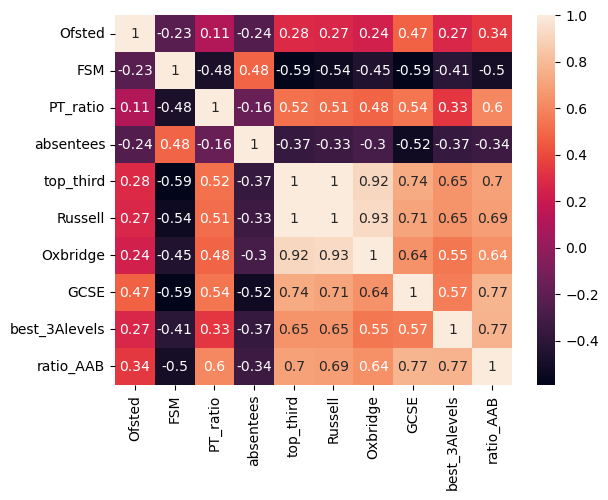

In [23]:
#import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.pairplot(PW_correlation)
sns.heatmap(PW_correlation, annot=True)

#### 2F. Create a single data frame including ‘PC’, ‘normalised price’ from task 1 and the rest of the measures of performance in the data frame Full. Perform any statistical analysis you wish. Create appropriate graphs using R to illustrate your statistical analysis. Use an appropriate regression model from sklearn to predict the ‘normalised price’ using ‘PC’ and the other variables in your data frame. Test your model using the test data set. Discuss your results

In [24]:
#detachinfo_df1
#Full
#Full['PC'] = Full['PC'].dtype
#Full_1.columns.values
#F_1['PC'] = F_1['PC'].astype(int)
#F_1
T12_merge_df = F_1.merge(detachinfo_df1[['PC', 'normalized_price']], on='PC', how='left')
T12_merge_df


,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB,PC,normalized_price
0,3.0,13.0,18.1,11.8,8.0,4.0,0.0,58.0,11.67,0.0,47.0,NaN
1,4.0,71.7,15.4,8.8,6.0,6.0,0.0,71.0,25.15,0.0,74.0,NaN
2,4.0,70.0,13.3,15.2,5.0,5.0,0.0,41.0,28.21,7.7,64.0,0.541667
3,4.0,31.1,15.2,7.4,13.0,6.0,0.0,60.0,30.98,5.9,192.0,NaN
4,1.0,74.2,13.4,7.9,10.0,10.0,0.0,44.0,32.63,3.0,120.0,NaN
5,1.0,71.2,13.1,11.8,9.0,9.0,0.0,18.0,22.00,4.0,192.0,NaN
6,4.0,27.2,17.6,11.7,59.0,53.0,2.0,97.0,35.93,28.2,66.0,0.583333
7,3.0,53.0,14.4,12.4,9.0,9.0,0.0,41.0,29.33,2.2,94.0,NaN
8,4.0,18.0,18.5,7.5,65.0,58.0,6.0,99.0,38.46,25.9,219.0,NaN
9,4.0,37.8,14.8,7.1,23.0,22.0,0.0,71.0,35.79,8.2,169.0,0.708333


In [25]:

#T12_merge_df['normalized_price'].fillna(value=NaN, inplace=True)

T12_merge_df = T12_merge_df.dropna(subset=['normalized_price'])

T12_merge_df = T12_merge_df.groupby('PC', as_index=False).agg({'normalized_price': 'mean', **{col: 'first' for col in Full.columns if col != 'PC'}})



# select the columns of interest
#cols_of_interest = ["Ofsted", "FSM", "PT_ratio", "absentees", "top_third", "Russell", "Oxbridge", "GCSE", "best_3Alevels", "ratio_AAB", "PC", "normalized_price"]
#data = T12_merge_df[cols_of_interest]

# display summary statistics
#print(data.describe())
T12_merge_df.describe()

#print(T12_merge_df)

#print(T12_merge_df["Ofsted"].mean())
#print(T12_merge_df["FSM"].median())
#print(T12_merge_df["PT_ratio"].min())
#print(T12_merge_df["absentees"].max())
#print(T12_merge_df["top_third"].std())



,PC,normalized_price,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,ratio_AAB
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,190.000000,0.479167,3.20000,49.100000,15.500000,12.90000,20.600000,19.20000,0.400000,53.000000,30.848000,11.500000
std,156.864591,0.192074,1.30384,16.974687,1.592168,8.02278,22.689204,20.12958,0.894427,30.430248,4.639172,9.367764
min,64.000000,0.250000,1.00000,27.200000,13.300000,5.10000,5.000000,5.00000,0.000000,23.000000,26.260000,6.100000
25%,66.000000,0.312500,3.00000,37.800000,14.800000,7.10000,5.000000,5.00000,0.000000,33.000000,28.050000,7.300000
50%,169.000000,0.541667,4.00000,51.200000,15.700000,11.70000,11.000000,11.00000,0.000000,41.000000,28.210000,7.700000
75%,203.000000,0.583333,4.00000,59.300000,16.100000,15.20000,23.000000,22.00000,0.000000,71.000000,35.790000,8.200000
max,448.000000,0.708333,4.00000,70.000000,17.600000,25.40000,59.000000,53.00000,2.000000,97.000000,35.930000,28.200000


To plot the graphs in R markdown , we need to have the merged dataframe from task 1 and task 2 converted to csv file. In the below step we are converting the merged data frame to merged_data_task1_2.csv

In [26]:

T12_merge_df.to_csv('merged_data_task1_2.csv')
T12_merge_df.to_csv('/Users/tharunkc/Documents/Term-1/merged_data_task1_2.csv')

From the R markdown file, the "normalized price" is concentrated within the range of 0.6 - 0.8 with a high frequency. The x-axis is the normalized price and it ranges from 0.1 to 0.8. The y-axis is the frequency and it ranges from 1 to 2. The plot shows that at the normalized prices of 0.6, 0.7, and 0.8, the frequency is very high. This suggests that most of the prices in the dataset are normalized and fall within this range, and prices at 0.6, 0.7, and 0.8 are the most common among all.

For PC, The line on the graph appears to be decreasing as PC increases, with a starting density of 0.0015 and ending density of 0.0003. There also appear to be fluctuations in the line, indicating variations in density at certain PC values. Overall, the graph suggests that as PC increases, the density decreases and becomes more variable.

The graph appears to show the relationship between Russell and Oxbridge on the x-axis and y-axis, respectively. The line graph starts at the origin (0,0) and follows a straight line until the x-axis value of 2.5, at which point the line begins to rise. The highest point on the graph appears to be at the x-axis value of 9. This suggests that as the value of Russell increases, the value of Oxbridge also increases, but at a steeper rate after 2.5 on the x-axis. The graph might represent some kind of correlation or causal relationship between the two variables.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = T12_merge_df[["PC","Ofsted", "FSM", "PT_ratio", "absentees", "top_third", "Russell", "Oxbridge", "GCSE", "best_3Alevels", "ratio_AAB"]]
y = T12_merge_df["normalized_price"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.dropna()
y_train.dropna()


model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)

print(model.score(X,y))

y_pred = model.predict(X_test)
y_pred


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Score: {r2:.4f}')

Coefficients:  [-0.00054959  0.00010823 -0.00228108 -0.00129528  0.01197974 -0.0020686
 -0.00230605  0.          0.0098871   0.00381063  0.00168359]
-0.09826389856042494
Mean Absolute Error: 0.4026
Mean Squared Error: 0.1621
R-squared Score: nan


/Users/tharunkc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


 Regarding the output of the model, R-squared score is a statistical measure of how well the regression line approximates the real data points. An R-squared score of 1 indicates that the model perfectly fits the data, while a score of 0 indicates that the model does not fit the data at all. Since the R-squared score is showing "nan" this means that the model is not providing good fit for the data set and the variables chosen doesn't explain the outcome variable properly.
 
 
 The other scores, Mean Absolute Error and Mean Squared Error are the measures of how much the model predictions deviate from the actual values. A smaller value of these scores indicates that the model is performing better and providing more accurate predictions.